In [68]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
import glob

In [69]:
qualtrics_raw = pd.read_csv("./raw data (22-11)/qualtrics/Gaia's Bachelor_November 22, 2025_13.34.csv")
#display(qualtrics_raw)
qualtrics_cleaned = qualtrics_raw[['Consent', 'Q12', 'Q14', 'Q17', 'Q22_1', 'Q22_2', 'Q22_3','Q22_4', 'Q22_5', 'Q22_6', 'Q22_7', 'Q22_8', 'Q22_9', 'Q22_10','Q22_11', 'Q25', 'Q32', 'Q24', 'Q27', 'Q23_1', 'Q23_2', 'Q23_3', 'Q23_4', 'Q23_5', 'Q23_6', 'Q23_7', 'Random ID']]
qualtrics_cleaned = qualtrics_cleaned.drop(1) #deletes the row importing the Qualtrics specific names for variables
#display(qualtrics_cleaned)

qualtrics_removed = qualtrics_cleaned.copy() 

qualtrics_final = qualtrics_removed[qualtrics_removed.Q32 == "Maybe"] #removes participants who failed the attention check by answering yes or no instead of maybe. 
qualtrics_final = qualtrics_final[qualtrics_final.Consent == "Yes"]

qualtrics_final= qualtrics_final.reset_index(drop = True) #resets index

pd.set_option('display.max_columns', None) #prints all columns 


In [70]:
#calculate average and median age 
mean_age = pd.to_numeric(qualtrics_final["Q12"]).mean()
median_age = pd.to_numeric(qualtrics_final["Q12"]).median()

# calculate the amounts of male, female and other participants
gender_count = qualtrics_final["Q14"].value_counts()

# hours playing games difference 
hours_played = qualtrics_final["Q24"].value_counts()

# adhd or not adhd 
neurodivergent_count = qualtrics_final["Q17"].value_counts()

#age started playing
started_playing_count = qualtrics_final["Q25"].value_counts()

#competitive experience
competitive_exp = qualtrics_final["Q27"].value_counts()

In [71]:
#This codeblock encodes the Likert-scale answers to numeric answers. 

##GAME ADDICTION##
# 1 = strongly disagree, 2 = disagree, 3 = neither agree nor disagree, 4 = agree, 5 = strongly agree
# the code below replaces the string value with their corresponding integer value, to allow for calculation of average game addiction score. 
qualtrics_encoded = qualtrics_final.copy()
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Never", value = 1)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Rarely", value = 2)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Sometimes", value = 3)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Often", value = 4)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Very often", value = 5)


##IMMERSION EVALUATION QUESTIONNAIRE - SHORT FORM## 
#never = 1, rarely = 2, sometimes = 3, often = 4, very often = 5 (2 questions are reverse scored)

#factor: Involvement, Columns: Q22_1, Q22_2, Q22_3, Q22_4 
#factor: Real world dissasociation, Colums: Q22_5 (REVERSE), Q22_6, Q22_7, Q22_8
#factor: Challenge, Columns: Q22_9, Q22_10 (REVERSE), Q22_11

#Below codeblock only encodes Q22_5 and Q22_10 as they're reversely coded, with Strongly Disagree being 5 and Strongly Agree being 1
qualtrics_encoded = qualtrics_encoded.replace({"Q22_5": "Strongly Disagree", "Q22_10" : "Strongly Disagree"}, 5)
qualtrics_encoded = qualtrics_encoded.replace({"Q22_5": "Disagree", "Q22_10" : "Disagree"}, 4)
qualtrics_encoded = qualtrics_encoded.replace({"Q22_5": "Neither agree nor disagree", "Q22_10" : "Neither agree nor disagree"}, 3)
qualtrics_encoded = qualtrics_encoded.replace({"Q22_5": "Agree", "Q22_10" : "Agree"}, 2)
qualtrics_encoded = qualtrics_encoded.replace({"Q22_5": "Strongly Agree", "Q22_10" : "Strongly Agree"}, 1)

#The codeblock below encodes the rest of the Q's, which are 'normally' encoded
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Strongly Disagree", value = 1)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Disagree", value = 2)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Neither agree nor disagree", value = 3)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Agree", value = 4)
qualtrics_encoded = qualtrics_encoded.replace(to_replace= "Strongly Agree", value = 5)


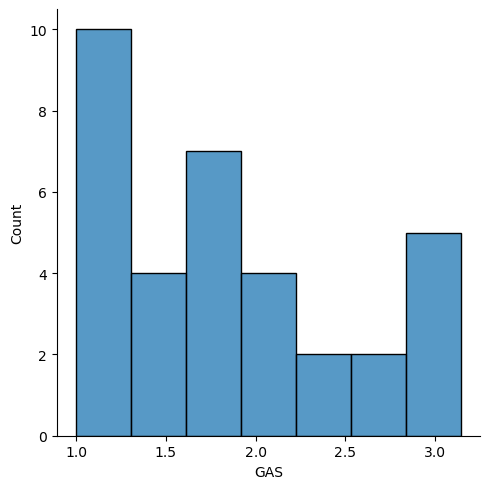

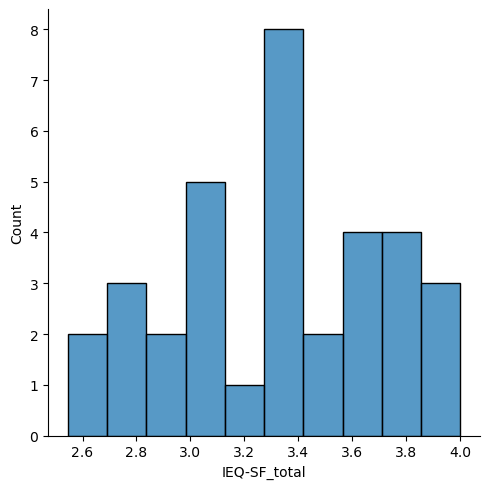

In [72]:
##GAME ADDICTION##
#calculates the mean game addiction score per participant
qualtrics_encoded['GAS'] = qualtrics_encoded.iloc[:, 19:26].sum(axis = 1)/7 #will be used to compare groups and performances, mostly as an explanation for confounding variables.

#total participants statistics
GAS_avg = qualtrics_encoded['GAS'].mean()
GAS_med = qualtrics_encoded['GAS'].median()
GAS_sd = qualtrics_encoded['GAS'].std()

sns.displot(qualtrics_encoded, x = "GAS")

##IEQ-SF##
#the codeblock below creates new colums for the individual factor means per participant
qualtrics_encoded['IEQ-SF_Inv'] = qualtrics_encoded.iloc[:, 4: 8].sum(axis = 1) / 4
qualtrics_encoded['IEQ-SF_RWD'] = qualtrics_encoded.iloc[:, 8: 12].sum(axis = 1) /4 
qualtrics_encoded['IEQ-SF_Ch'] = qualtrics_encoded.iloc[:, 12: 15].sum(axis = 1) / 3

#calculates the total IEQ-SF score per participant
qualtrics_encoded['IEQ-SF_total'] = qualtrics_encoded.iloc[:, 4:15].sum(axis = 1) / 11

#total participant statistics 
##per factor##
IEQSF_Inv_avg = qualtrics_encoded['IEQ-SF_Inv'].mean()
IEQSF_Inv_med = qualtrics_encoded['IEQ-SF_Inv'].median()
IEQSF_Inv_sd = qualtrics_encoded['IEQ-SF_Inv'].std()

IEQSF_RWD_avg = qualtrics_encoded['IEQ-SF_RWD'].mean()
IEQSF_RWD_med = qualtrics_encoded['IEQ-SF_RWD'].median()
IEQSF_RWD_sd = qualtrics_encoded['IEQ-SF_RWD'].std()

IEQSF_Ch_avg = qualtrics_encoded['IEQ-SF_Ch'].mean()
IEQSF_Ch_med = qualtrics_encoded['IEQ-SF_Ch'].median()
IEQSF_Ch_sd = qualtrics_encoded['IEQ-SF_Ch'].std()

##Total scores##
IEQSF_total_avg = qualtrics_encoded['IEQ-SF_total'].mean()
IEQSF_total_med = qualtrics_encoded['IEQ-SF_total'].median()
IEQSF_total_sd = qualtrics_encoded['IEQ-SF_total'].std()

sns.displot(qualtrics_encoded, x = "IEQ-SF_total", binwidth = 0.15)

In [73]:
combined_raw = qualtrics_encoded.copy() #makes a copy for combining the questionnaire data with the experiment data

#adds empty colums in order to merge the two different csv files
combined_raw["avg_deaths"] = pd.NA
combined_raw["avg_totaltime"] = pd.NA
combined_raw["control_highscore"] = pd.NA
combined_raw["control_deaths"] = pd.NA
combined_raw["oneback_tp"] = pd.NA
combined_raw["oneback_fn"] = pd.NA
combined_raw["oneback_fp"] = pd.NA
combined_raw["oneback_avgRT_TP"] = pd.NA
combined_raw["oneback_avgRT_FP"] = pd.NA
combined_raw["twoback_tp"] = pd.NA
combined_raw["twoback_fn"] = pd.NA
combined_raw["twoback_fp"] = pd.NA
combined_raw["twoback_avgRT_TP"] = pd.NA
combined_raw["twoback_avgRT_FP"] = pd.NA
display(combined_raw["Random ID"])
combined_raw = combined_raw.set_index("Random ID")

display(combined_raw.head())

0     3340359
1     6451087
2     4075440
3     8371658
4     7256682
5     7283041
6     7112512
7     2208891
8     9030964
9     5746243
10    4104465
11    3364023
12    4908417
13    1373223
14    2486184
15    9168808
16    5004098
17    1820859
18    5831886
19    9026801
20    5190054
21    2452707
22    2651669
23    1230704
24    4955876
25    2187523
26    8767158
27    5137413
28    6552557
29    9805249
30    3580415
31    9327211
32    4135497
33    7355252
Name: Random ID, dtype: object

,Consent,Q12,Q14,Q17,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,Q22_6,Q22_7,Q22_8,Q22_9,Q22_10,Q22_11,Q25,Q32,Q24,Q27,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,GAS,IEQ-SF_Inv,IEQ-SF_RWD,IEQ-SF_Ch,IEQ-SF_total,avg_deaths,avg_totaltime,control_highscore,control_deaths,oneback_tp,oneback_fn,oneback_fp,oneback_avgRT_TP,oneback_avgRT_FP,twoback_tp,twoback_fn,twoback_fp,twoback_avgRT_TP,twoback_avgRT_FP
Random ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3340359,Yes,21,Male,No,4,4,5,5,3,4,4,2,4,4,4,7-11 years,Maybe,0-3 hours,Yes,2,3,4,2,3,1,2,2.428571,4.50,3.25,4.000000,3.909091,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6451087,Yes,23,Other,No,5,4,4,5,4,2,2,1,2,2,2,2-7 years,Maybe,More than 7 hours,Yes,3,4,4,1,2,1,3,2.571429,4.50,2.25,2.000000,3.000000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4075440,Yes,18,Female,No,4,3,4,4,5,4,2,2,2,2,1,2-7 years,Maybe,More than 7 hours,No,3,3,1,1,2,1,1,1.714286,3.75,3.25,1.666667,3.000000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8371658,Yes,20,Male,Yes,4,3,4,4,4,4,3,4,3,3,4,2-7 years,Maybe,4-6 hours,No,2,3,2,1,2,1,3,2.000000,3.75,3.75,3.333333,3.636364,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7256682,Yes,21,Male,No,3,2,2,3,2,3,2,2,3,4,4,2-7 years,Maybe,4-6 hours,Yes,1,1,1,1,1,1,3,1.285714,2.50,2.25,3.666667,2.727273,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [85]:
#add experimental data together with n-back first, with the N-back replacing null values 
filepaths = glob.glob('../data/*.csv')

for i in filepaths: 
    try:
        temp_file = pd.read_csv(i)
        processed_temp_file = temp_file.dropna(axis =1).drop(["date", "time"], axis = 1).set_index("ext_id") #removes the empty columns, as well as the date and time columns automatically collected
        
        index = temp_file["ext_id"].astype("str")

        selected_row = combined_raw.loc[index] #picks the row that has the index of our external id in combined_raw
        for col in processed_temp_file.columns:
            selected_row[col] = int(processed_temp_file[col].iloc[0])

        # replace old row with edited selected row
        combined_raw.loc[index] = selected_row

    except KeyError:
        continue

combined_raw = combined_raw[combined_raw["oneback_tp"].notna()] # filter out participants who did not complete the n-back task
combined_raw = combined_raw[combined_raw["avg_deaths"].isna() != combined_raw["control_highscore"].isna()] #filtered out anyone who didn´t complete any VG
combined_raw["condition"] = np.where(combined_raw['avg_deaths'].isna(), 'control', 'experimental')
display(combined_raw.describe())
display(combined_raw.head())


,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,Q22_6,Q22_7,Q22_8,Q22_9,Q22_10,Q22_11,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,GAS,IEQ-SF_Inv,IEQ-SF_RWD,IEQ-SF_Ch,IEQ-SF_total
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,4.064516,2.935484,4.161290,4.064516,2.838710,3.225806,2.645161,2.419355,3.419355,3.161290,3.387097,1.870968,2.354839,2.129032,1.612903,1.774194,1.290323,1.967742,1.857143,3.806452,2.782258,3.322581,3.302053
std,0.771815,1.030711,0.898027,0.813858,1.293491,1.023383,1.112007,0.885972,1.025482,1.035914,1.229564,0.957146,0.984831,1.117794,0.954897,0.844972,0.824360,1.110071,0.653614,0.634789,0.706346,0.879747,0.408172
min,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.500000,1.500000,1.333333,2.545455
25%,4.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.285714,3.500000,2.250000,2.666667,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.857143,3.750000,2.500000,3.666667,3.272727
75%,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.500000,3.000000,4.000000,4.000000,4.000000,2.500000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.214286,4.375000,3.250000,4.000000,3.636364
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,3.142857,4.750000,4.250000,5.000000,4.000000


,Consent,Q12,Q14,Q17,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,Q22_6,Q22_7,Q22_8,Q22_9,Q22_10,Q22_11,Q25,Q32,Q24,Q27,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,GAS,IEQ-SF_Inv,IEQ-SF_RWD,IEQ-SF_Ch,IEQ-SF_total,avg_deaths,avg_totaltime,control_highscore,control_deaths,oneback_tp,oneback_fn,oneback_fp,oneback_avgRT_TP,oneback_avgRT_FP,twoback_tp,twoback_fn,twoback_fp,twoback_avgRT_TP,twoback_avgRT_FP,condition
Random ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3340359,Yes,21,Male,No,4,4,5,5,3,4,4,2,4,4,4,7-11 years,Maybe,0-3 hours,Yes,2,3,4,2,3,1,2,2.428571,4.50,3.25,4.000000,3.909091,<NA>,<NA>,2706,2,11,0,0,460,0,10,2,2,1046,801,control
4075440,Yes,18,Female,No,4,3,4,4,5,4,2,2,2,2,1,2-7 years,Maybe,More than 7 hours,No,3,3,1,1,2,1,1,1.714286,3.75,3.25,1.666667,3.000000,3,361962,<NA>,<NA>,12,0,1,743,421,11,1,0,676,0,experimental
8371658,Yes,20,Male,Yes,4,3,4,4,4,4,3,4,3,3,4,2-7 years,Maybe,4-6 hours,No,2,3,2,1,2,1,3,2.000000,3.75,3.75,3.333333,3.636364,4,303726,<NA>,<NA>,11,0,0,707,0,12,0,0,483,0,experimental
7256682,Yes,21,Male,No,3,2,2,3,2,3,2,2,3,4,4,2-7 years,Maybe,4-6 hours,Yes,1,1,1,1,1,1,3,1.285714,2.50,2.25,3.666667,2.727273,<NA>,<NA>,2748,2,11,0,0,570,0,11,0,3,734,678,control
7283041,Yes,22,Female,No,4,4,4,5,2,2,2,2,3,3,1,2-7 years,Maybe,4-6 hours,No,2,3,1,2,2,1,2,1.857143,4.25,2.00,2.333333,2.909091,2,318018,<NA>,<NA>,11,1,1,611,25,6,6,0,709,0,experimental


In [78]:
# export the csv file for later use
combined_raw.to_csv("data_combined_preprocessed_out.csv")